In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
df = pd.read_csv('data/Grade_Set_1.csv')
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


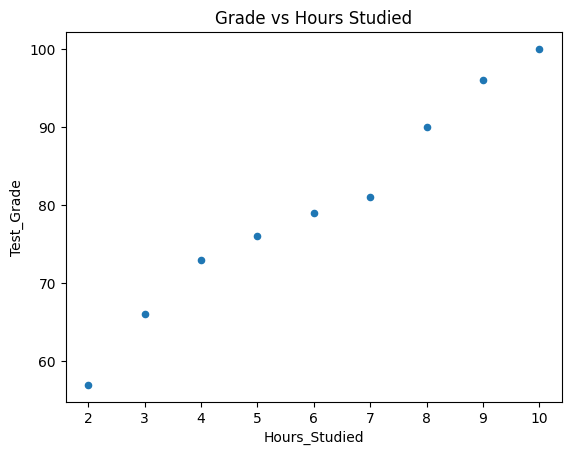

In [3]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

In [4]:
print("Correlation Matrix: ")
df.corr()

Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


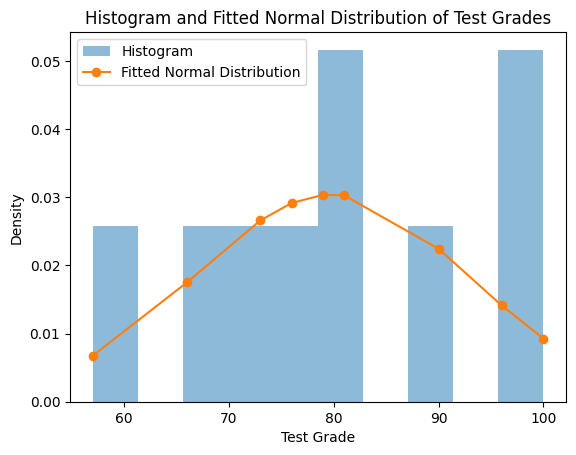

In [5]:
# Fit a normal distribution to the data
fit = stats.norm.pdf(df['Test_Grade'], np.mean(df['Test_Grade']), np.std(df['Test_Grade']))

# Plot the histogram
plt.hist(df['Test_Grade'], density=True, alpha=0.5, label='Histogram')  # alpha adds transparency to the bars

# Plot the fitted normal distribution
plt.plot(df['Test_Grade'], fit, '-o', label='Fitted Normal Distribution')

# Set x-label and y-label
plt.xlabel('Test Grade')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Show the plot
plt.title('Histogram and Fitted Normal Distribution of Test Grades')
plt.show()

In [6]:
x = df['Hours_Studied'].values[:, np.newaxis]  # Convert to NumPy array and add a new axis
y = df['Test_Grade'].values                    # Dependent variable

In [7]:
# Create linear regression object
lr = lm.LinearRegression()

In [8]:
# Train the model using the training sets
lr.fit(x, y)

LinearRegression()

In [9]:
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

Intercept:  49.67777777777776
Coefficient:  [5.01666667]


In [10]:
# manual prediction for a given value of x
print("Manual prdiction :", 49.67777777777776 + 5.01666667*6)

Manual prdiction : 79.77777779777776


In [11]:
predicted_value = lr.predict(np.array([6]).reshape(-1, 1))
print("Using predict function:", predicted_value)

Using predict function: [79.77777778]


Text(0.5, 0, 'Hours_Studied')

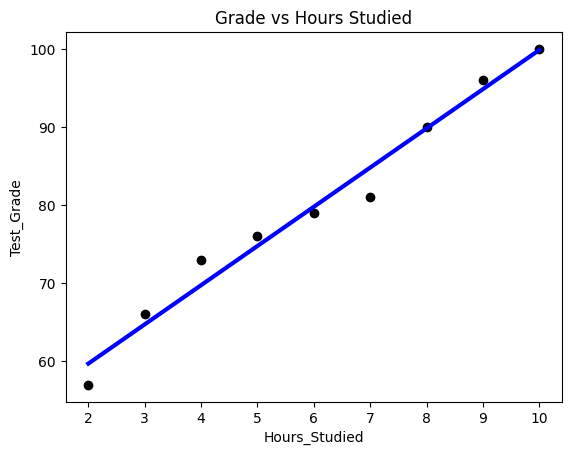

In [12]:
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

***How Good Is Your Model?***

There are three metrics widely used for evaluating linear model performance.

1. R-squared
2. RMSE
3. MAE

In [16]:
df['Test_Grade_Pred'] = lr.predict(x)

# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())
print ("Sum of SSR:", df['SSR'].sum())
print ("Sum of SST:", df['SST'].sum())
df

Sum of SSR: 1510.0166666666673
Sum of SST: 1547.5555555555557


,Hours_Studied,Test_Grade,Test_Grade_Pred,SST,SSR
0,2,57,59.711111,518.827160,402.671111
1,3,66,64.727778,189.827160,226.502500
2,4,73,69.744444,45.938272,100.667778
3,5,76,74.761111,14.271605,25.166944
4,6,79,79.777778,0.604938,0.000000
5,7,81,84.794444,1.493827,25.166944
6,8,90,89.811111,104.493827,100.667778
7,9,96,94.827778,263.160494,226.502500
8,10,100,99.844444,408.938272,402.671111


In [18]:
# df.to_csv('data/r-squared.csv', index=False)

In [19]:
print ("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

R Squared using manual calculation:  0.9757431074095351


In [20]:
# Using built-in function
print ("R Squared using built-in function: ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

R Squared using built-in function:  0.9757431074095347
Mean Absolute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297


***Polynomial***

It is a form higher order linear regression modeled between dependent and independent variables as an nth degree polynomial.

In [21]:
# Load data
df = pd.read_csv('data/Grade_Set_2.csv')
df

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25
5,5.0,37
6,6.0,48
7,7.0,56
8,8.0,67
9,9.0,76


<Axes: title={'center': 'Grade vs Hours Studied'}, xlabel='Hours_Studied', ylabel='Test_Grade'>

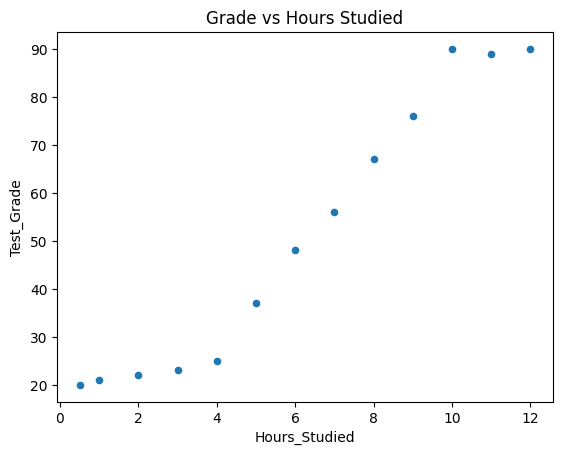

In [22]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

In [23]:
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()

Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.974868
Test_Grade,0.974868,1.000000


In [24]:
# Create linear regression object
lr = lm.LinearRegression()
x = df['Hours_Studied'].values[:, np.newaxis]  # independent variable
y = df['Test_Grade'].values     # dependent variable

In [25]:
# Train the model using the training sets
lr.fit(x, y)
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)

Intercept:  7.27106067219556
Coefficient:  [7.25447403]


In [26]:
# manual prediction for a given value of x
print ("Manual prdiction :", 5.74120829576 + 7.24436429*6)

Manual prdiction : 49.207394035760004


In [28]:
# predict using the built-in function
print ("Using predict function: ", lr.predict(np.array([6]).reshape(-1, 1)))

Using predict function:  [50.79790485]


R Squared:  0.9503677766997879


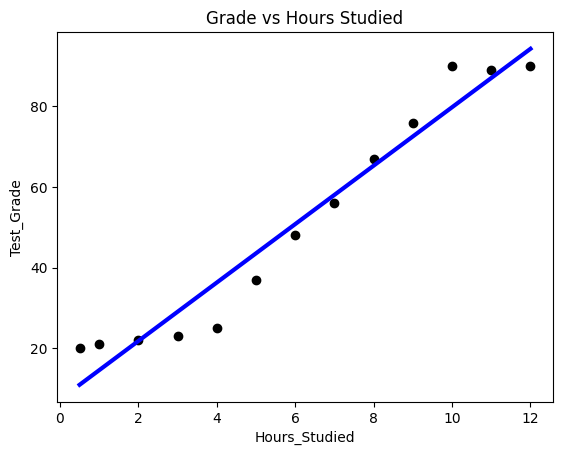

In [29]:
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print ("R Squared: ", r2_score(y, lr.predict(x)))

R-squared for degree 1 =  0.9503677766997879
R-squared for degree 2 =  0.9608726568678714
R-squared for degree 3 =  0.9938323120374665
R-squared for degree 4 =  0.9955000184096712
R-squared for degree 5 =  0.9956204913897357


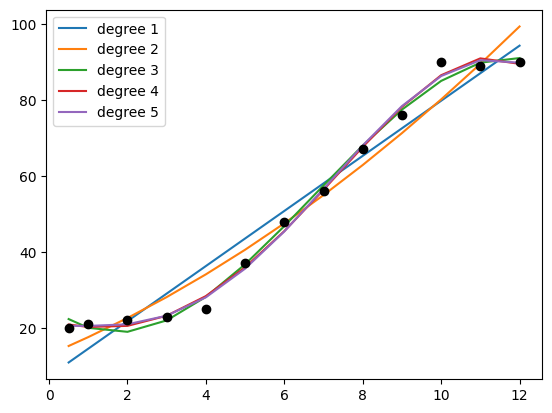

In [31]:
lr = lm.LinearRegression()

x= df.Hours_Studied        # independent variable
y= df.Test_Grade           # dependent variable 

# NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    print ("R-squared for degree " + str(deg) + " = ",  r2_score(y, y_lr))
plt.plot(x, y, 'ok')

R Squared using built-in function:  0.9938323120374665


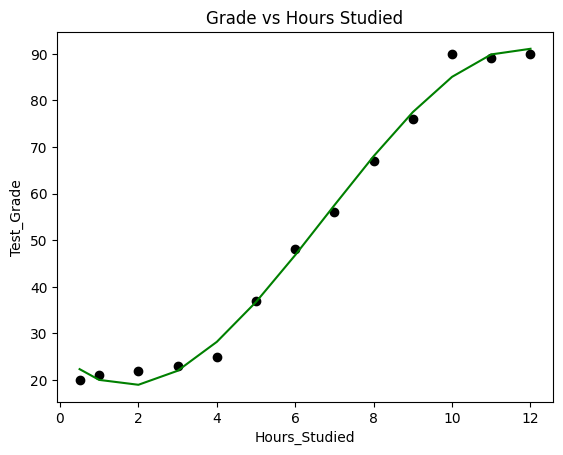

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = df['Hours_Studied'].values[:, np.newaxis]  # independent variable
y = df['Test_Grade'].values     # dependent variable

degree = 3
model = make_pipeline(PolynomialFeatures(degree), lr)


model.fit(x, y)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='green')
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print ("R Squared using built-in function: ", r2_score(y, model.predict(x)))

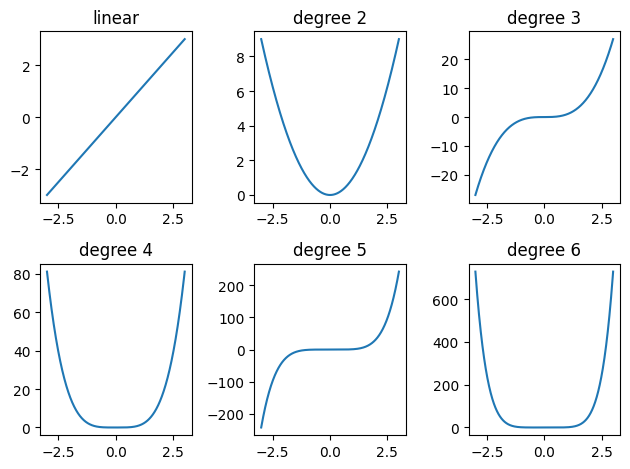

In [34]:
x = np.linspace(-3,3,1000)

# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')

# tidy layout
plt.tight_layout()